In [1]:
import json, os
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [2]:
bug_list_file = './bugs_list.txt'
with open(bug_list_file, 'r') as f:
    bug_list = f.read().splitlines()

print(bug_list)

['Chart_1', 'Chart_10', 'Chart_11', 'Chart_12', 'Chart_13', 'Chart_15', 'Chart_17', 'Chart_20', 'Chart_24', 'Chart_26', 'Chart_3', 'Chart_4', 'Chart_5', 'Chart_6', 'Chart_7', 'Chart_8', 'Chart_9', 'Lang_1', 'Lang_10', 'Lang_11', 'Lang_12', 'Lang_14', 'Lang_16', 'Lang_17', 'Lang_18', 'Lang_19', 'Lang_21', 'Lang_22', 'Lang_24', 'Lang_26', 'Lang_27', 'Lang_28', 'Lang_29', 'Lang_3', 'Lang_31', 'Lang_33', 'Lang_35', 'Lang_37', 'Lang_38', 'Lang_39', 'Lang_40', 'Lang_42', 'Lang_43', 'Lang_44', 'Lang_45', 'Lang_48', 'Lang_49', 'Lang_5', 'Lang_51', 'Lang_52', 'Lang_53', 'Lang_54', 'Lang_55', 'Lang_57', 'Lang_58', 'Lang_59', 'Lang_6', 'Lang_60', 'Lang_61', 'Lang_62', 'Lang_64', 'Lang_65', 'Lang_9', 'Math_10', 'Math_100', 'Math_101', 'Math_102', 'Math_103', 'Math_105', 'Math_106', 'Math_11', 'Math_13', 'Math_14', 'Math_15', 'Math_16', 'Math_17', 'Math_19', 'Math_2', 'Math_20', 'Math_21', 'Math_23', 'Math_24', 'Math_25', 'Math_26', 'Math_27', 'Math_28', 'Math_3', 'Math_30', 'Math_31', 'Math_32', '

In [3]:
d4j_bug_list = os.listdir('./AutoFL/data/defects4j')
bip_bug_list = os.listdir('./AutoFL/data/bugsinpy')

In [5]:
bip_combined_results_file = './AutoFL/combined_fl_results/bip_gpt4o_results_R10_full.json'
with open(bip_combined_results_file, 'r') as f:
    bip_combined_result = json.load(f)

d4j_combined_results_file = './AutoFL/combined_fl_results/d4j_gpt4o_results_R10_full.json'
with open(d4j_combined_results_file, 'r') as f:
    d4j_combined_result = json.load(f)

In [7]:
bip_fl_success = dict()
d4j_fl_success = dict()

bip_confidence = dict()
d4j_confidence = dict()

for bug in bug_list:
    if bug in bip_bug_list:
        buggy_methods = bip_combined_result["buggy_methods"][bug]
        if len(buggy_methods) != 1:
            pass
        else:
            method_name, method_info = next(iter(buggy_methods.items()))
            if method_info.get("autofl_rank") == 1:
                bip_fl_success[bug] = True
            else:
                bip_fl_success[bug] = False

        confidence = bip_combined_result["confidence"]
        bip_confidence[bug] = confidence[bug]

    if bug in d4j_bug_list:
        buggy_methods = d4j_combined_result["buggy_methods"][bug]
        if len(buggy_methods) != 1:
            pass
        else:
            method_name, method_info = next(iter(buggy_methods.items()))
            if method_info.get("autofl_rank") == 1:
                d4j_fl_success[bug] = True
            else:
                d4j_fl_success[bug] = False
        
        confidence = d4j_combined_result["confidence"]
        d4j_confidence[bug] = confidence[bug]


In [8]:
all_confidences = []
all_labels = []

for bug in bug_list:
    if bug in bip_bug_list:
        buggy_methods = bip_combined_result["buggy_methods"][bug]
        if len(buggy_methods) != 1:
            # print(project)
            pass
        else:
            method_name, method_info = next(iter(buggy_methods.items()))
            if method_info.get("autofl_rank") == 1:
                all_labels.append(1)
            else:
                all_labels.append(0)
        
        all_confidences.append(bip_combined_result["confidence"][bug])

    if bug in d4j_bug_list:
        buggy_methods = d4j_combined_result["buggy_methods"][bug]
        if len(buggy_methods) != 1:
            # print(project)
            pass
        else:
            method_name, method_info = next(iter(buggy_methods.items()))
            if method_info.get("autofl_rank") == 1:
                all_labels.append(1)
            else:
                all_labels.append(0)
        
        all_confidences.append(d4j_combined_result["confidence"][bug])
print(all_confidences)
print(all_labels)
print(len(all_confidences))
print(len(all_labels))



[0.6833333333333333, 1.0, 1.0, 0.95, 0.7, 0.7833333333333333, 0.6, 1.0, 0.9333333333333332, 0.7333333333333333, 0.8333333333333334, 0.4333333333333333, 0.7, 0.7666666666666666, 1.0, 0.6, 0.6166666666666667, 0.65, 0.225, 0.6, 0.8, 1.0, 1.0, 0.75, 0.2916666666666667, 1.0, 1.0, 0.5, 1.0, 0.24166666666666664, 1.0, 0.95, 0.9, 0.95, 0.95, 1.0, 0.8, 1.0, 0.4833333333333333, 0.75, 1.0, 0.75, 0.6, 1.0, 1.0, 1.0, 0.6166666666666667, 1.0, 1.0, 1.0, 0.85, 1.0, 0.8333333333333334, 1.0, 0.9, 0.7, 0.6166666666666666, 0.8666666666666666, 0.4833333333333334, 0.9, 1.0, 0.55, 0.6, 1.0, 0.5333333333333333, 1.0, 0.8, 0.5666666666666667, 0.75, 0.75, 0.55, 0.2333333333333333, 0.33333333333333337, 1.0, 0.6166666666666667, 0.5333333333333334, 0.5666666666666667, 0.21666666666666665, 0.38333333333333336, 0.8, 0.6, 0.7166666666666666, 0.5, 0.6, 0.8, 0.2833333333333333, 1.0, 0.5333333333333333, 0.4833333333333334, 0.5666666666666667, 0.2833333333333333, 1.0, 0.5833333333333333, 0.3083333333333333, 0.065, 0.433333

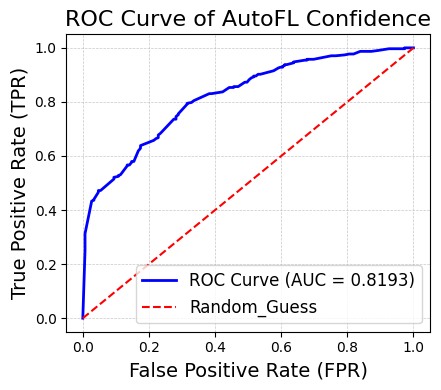

In [9]:
fpr, tpr, threshold = roc_curve(all_labels, all_confidences)
roc_auc = roc_auc_score(all_labels, all_confidences)

plt.figure(figsize=(4.5, 4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})', color='blue', linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='red', linewidth=1.5, label='Random_Guess')  # Random prediction line
plt.xlabel('False Positive Rate (FPR)', fontsize=14)
plt.ylabel('True Positive Rate (TPR)', fontsize=14)
plt.title('ROC Curve of AutoFL Confidence', fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()  # Ensure everything fits well
plt.savefig("./figures/Figure_AutoFL_ROC_AUC.pdf", format="pdf", dpi=300)
plt.show()


### get_classification acc

In [10]:
num_correct = 0

for confidence, label in zip(all_confidences, all_labels):
    if (confidence >= 0.5 and label == 1) or (confidence < 0.5 and label == 0):
        num_correct += 1

classification_acc = num_correct/len(all_confidences)
print(classification_acc)
print(num_correct)
print(len(all_confidences))

0.7609649122807017
347
456


### Get precision

In [11]:
num_precise = 0
num_predict_true = 0

for confidence, label in zip(all_confidences, all_labels):
    if confidence >= 0.5:
        num_predict_true += 1
        if label == 1:
            num_precise += 1

precision = num_precise / num_predict_true
print(precision)

0.8173076923076923


### Get recall

In [12]:
num_true_positive = 0
num_positive = 0

for confidence, label in zip(all_confidences, all_labels):
    if label == 1:
        num_positive += 1
        if confidence >= 0.5:
            num_true_positive += 1
        

recall = num_true_positive / num_positive
print(recall)

0.8306188925081434


### Baseline

In [ ]:
print(len(all_labels))
print(sum(all_labels))
print(sum(all_labels)/len(all_labels))

456
307
0.6732456140350878


: 